<a href="https://colab.research.google.com/github/ASLManasa/MY_Ml/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
# To run command-line arguments
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
import zipfile

In [ ]:
zip_File = '/content/drive/MyDrive/Lab-ml/Cats-vs-Dogs.zip'
zip_ref = zipfile.ZipFile(zip_File,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
cat_images = len(os.listdir(os.path.join('/content/Cats-vs-Dogs/Cat')))
dog_images = len(os.listdir(os.path.join('/content/Cats-vs-Dogs/Dog')))

In [ ]:
print(cat_images)

2000


In [ ]:
print(dog_images)

2000


1-->rgb to bgr
0-->bgr to rgb
2 -->nochange

If we see the image using matplotlib we have the image in bgr format so we have to convert it to rgb

<function matplotlib.pyplot.show>

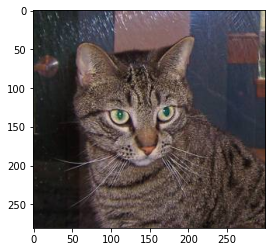

In [ ]:
# img1 =cv2.imread('/content/Cats-vs-Dogs/Cat/1.jpg',0)
img1 =cv2.imread('/content/Cats-vs-Dogs/Cat/1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
# cv2.imshow(img1)
plt.show


<function matplotlib.pyplot.show>

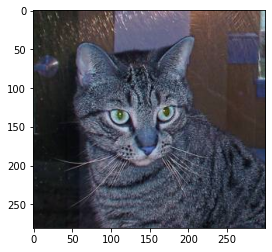

In [ ]:
# img1 =cv2.imread('/content/Cats-vs-Dogs/Cat/1.jpg',0)
img2 =cv2.imread('/content/Cats-vs-Dogs/Cat/1.jpg',1)
# img2 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
# cv2.imshow(img1)
plt.show


<function matplotlib.pyplot.show>

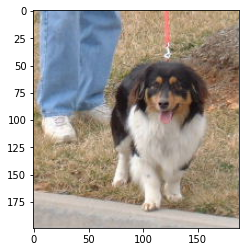

In [ ]:
# img1 =cv2.imread('/content/Cats-vs-Dogs/Cat/1.jpg',0)
img1 =cv2.imread('/content/Cats-vs-Dogs/Dog/2.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
# cv2.imshow(img1)
plt.show


Model From Scratch

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen =ImageDataGenerator(
    zoom_range =0.2,
    rescale = 1/255.,
    validation_split =0.01
)
train_gen = datagen.flow_from_directory('/content/Cats-vs-Dogs/',target_size = (300,300),class_mode='binary',subset='training')
test_gen = datagen.flow_from_directory('/content/Cats-vs-Dogs/',target_size = (300,300),class_mode='binary',subset='validation')

Found 3960 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
model= keras.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

#compiling the model
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['acc'])

In [ ]:
model.fit( train_gen, validation_data= test_gen,
          epochs=5, verbose=2 )

Epoch 1/5
124/124 - 110s - loss: 0.7085 - acc: 0.5149 - val_loss: 0.8929 - val_acc: 0.4500
Epoch 2/5
124/124 - 77s - loss: 0.6809 - acc: 0.5917 - val_loss: 0.6552 - val_acc: 0.6250
Epoch 3/5
124/124 - 77s - loss: 0.6321 - acc: 0.6604 - val_loss: 0.8129 - val_acc: 0.5750
Epoch 4/5
124/124 - 79s - loss: 0.5755 - acc: 0.7131 - val_loss: 0.5974 - val_acc: 0.6500
Epoch 5/5
124/124 - 77s - loss: 0.5321 - acc: 0.7336 - val_loss: 0.5250 - val_acc: 0.6750


In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(model.history.history)
data

,loss,acc,val_loss,val_acc
0,0.708460,0.514899,0.892888,0.450
1,0.680898,0.591667,0.655164,0.625
2,0.632124,0.660354,0.812876,0.575
3,0.575498,0.713131,0.597378,0.650
4,0.532075,0.733586,0.525029,0.675


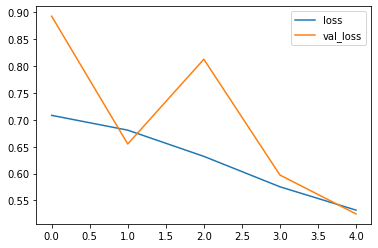

In [ ]:
data[['loss','val_loss']].plot()

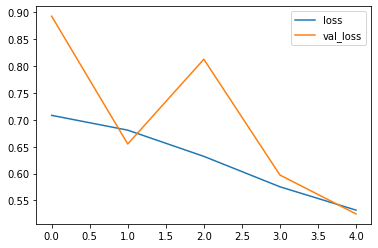

In [ ]:
data[['loss','val_loss']].plot()